In [1]:
from hamiltonians import *

In [2]:
sr = ShortRangeHeisenberg(4, [1,1,1])

In [3]:
sr.print()

Term 1 acting on the qubit locations [0, 1]:
	(1.00 + 0.00i) X_0 X_1 +
	(1.00 + 0.00i) Y_0 Y_1 +
	(1.00 + 0.00i) Z_0 Z_1 
Term 2 acting on the qubit locations [1, 2]:
	(1.00 + 0.00i) X_1 X_2 +
	(1.00 + 0.00i) Y_1 Y_2 +
	(1.00 + 0.00i) Z_1 Z_2 
Term 3 acting on the qubit locations [2, 3]:
	(1.00 + 0.00i) X_2 X_3 +
	(1.00 + 0.00i) Y_2 Y_3 +
	(1.00 + 0.00i) Z_2 Z_3 


In [4]:
sr.multiply_scalar(1j)
sr.print()

Term 1 acting on the qubit locations [0, 1]:
	(0.00 + 1.00i) X_0 X_1 +
	(0.00 + 1.00i) Y_0 Y_1 +
	(0.00 + 1.00i) Z_0 Z_1 
Term 2 acting on the qubit locations [1, 2]:
	(0.00 + 1.00i) X_1 X_2 +
	(0.00 + 1.00i) Y_1 Y_2 +
	(0.00 + 1.00i) Z_1 Z_2 
Term 3 acting on the qubit locations [2, 3]:
	(0.00 + 1.00i) X_2 X_3 +
	(0.00 + 1.00i) Y_2 Y_3 +
	(0.00 + 1.00i) Z_2 Z_3 


In [10]:
h = sr.get_matrix()
h.dtypepe

dtype('complex128')

In [12]:
print(sr.get_spectrum())

(array([-3.82842712+0.j, -1.        +0.j,  3.        +0.j,  1.82842712+0.j,
       -3.82842712+0.j, -1.        +0.j,  3.        +0.j,  1.82842712+0.j,
       -6.46410162+0.j, -3.82842712+0.j, -1.        +0.j,  0.46410162+0.j,
        1.82842712+0.j,  3.        +0.j,  3.        +0.j,  3.        +0.j]), array([[ 0.00000000e+00+0.j, -0.00000000e+00+0.j,  0.00000000e+00+0.j,
        -0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        -0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        -0.00000000e+00+0.j,  0.00000000e+00+0.j,  1.00000000e+00+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j, -0.00000000e+00+0.j,  0.00000000e+00+0.j,
        -0.00000000e+00+0.j, -2.70598050e-01+0.j, -5.00000000e-01+0.j,
         5.00000000e-01+0.j, -6.53281482e-01+0.j,  4.57830047e-17+0.j,
         2.36876701e-02+0.j,  4.07636676e-02+0.j,  1.45368940e-16+0.j,
        -4.45239273e-02+0.j,

In [13]:
print(sr.get_gs())

((-6.464101615137754+0j), array([ 0.00000000e+00+0.j,  4.57830047e-17+0.j, -1.36381435e-16+0.j,
       -1.49429245e-01+0.j,  7.86370998e-17+0.j,  5.57677536e-01+0.j,
       -4.08248290e-01+0.j,  0.00000000e+00+0.j, -5.59393725e-17+0.j,
       -4.08248290e-01+0.j,  5.57677536e-01+0.j,  0.00000000e+00+0.j,
       -1.49429245e-01+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j]))


In [14]:
sr.is_real_hamiltonian()

[True, True, True]

In [12]:
from helpers import *
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')

def plot_circle(points, c, r, l):
    fig, ax = plt.subplots(figsize=(4,4))

    s_x = [s_i[0] for s_i in points]
    s_y = [s_i[1] for s_i in points]

    pad = 0.3

    ax.scatter(s_x, s_y, vmin=0, vmax=100)
    ax.set( xlim=(-pad,l-1+pad), xticks=(np.arange(0,l)),
            ylim=(-pad,l-1+pad), yticks=(np.arange(0,l)) )

    # calculate sphere lines
    l_ = (c[0] - r, c[1])

    r_ = (c[0] + r, c[1])

    u_ = (c[0], c[1] + r)

    d_ = (c[0], c[1] - r)

    ax.plot(c[0], c[1], 'rs')
    ax.plot([l_[0], d_[0]], [l_[1], d_[1]], color='red')
    ax.plot([l_[0], u_[0]], [l_[1], u_[1]], color='red')
    ax.plot([r_[0], d_[0]], [r_[1], d_[1]], color='red')
    ax.plot([r_[0], u_[0]], [r_[1], u_[1]], color='red')

    plt.show()

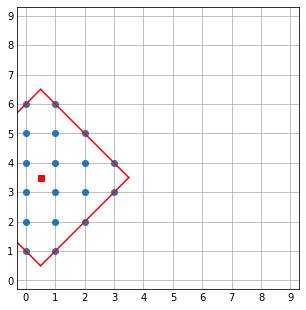

In [13]:
c=(0.5, 3.5)
r=3
d=2
l=10

s = get_m_sphere(c, r, d, l)

plot_circle(s, c, r, l)

In [42]:
def get_min_circle(points):
    center = get_center(points)
    max_dist = 0
    for p in points:
        if manhattan_dist(p, center) > max_dist:
            max_dist = manhattan_dist(p, center)
    return center, max_dist

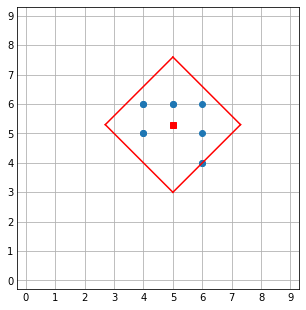

center at [5.  5.3]
radius: 2.3


In [164]:
l = 10
points = np.random.randint(low=4,high=7, size=(10,2))
c, r = get_min_circle(points)
plot_circle(points, c, r, l)
print('center at', c)
print('radius:', r)

In [81]:
points

array([[1, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0]])

In [65]:
p2 = np.delete(points, [1,3,5], axis=0)
print(p2)

[[1 0]
 [1 1]
 [0 0]
 [3 0]
 [2 0]
 [2 1]
 [0 0]]


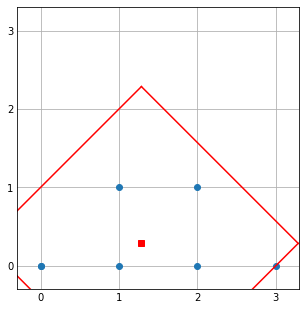

center at [1.28571429 0.28571429]
radius: 2.0


In [66]:
# p2 = np.delete(points, [1,3,5])

c, r  = get_min_circle(p2)
plot_circle(p2, c, r, l)
print('center at', c)
print('radius:', r)

In [195]:
def get_sphere(c, R, d, l):
    sphere = []
    if type(c) is not tuple:
        c = (c,)
    lb = max(int(np.ceil(c[0] - R)), 0)
    ub = min(int(np.ceil(c[0] + R)), l-1)
    for i in np.arange(lb, ub+1, 1):
        if d > 1:
            # calculate new radius
            if i <= c[0]:
                r = i - (c[0] - R)
            else:
                r = R - (i - c[0])

            sub_sphere = get_sphere(c[1:], r, d-1, l)
            for point in sub_sphere:
                sphere.append( (i,) + point )
        else:
            sphere.append( (i,) )
    return sphere

In [190]:
type(3) is not tuple

True

In [196]:
get_sphere(3, 2, 1, 10)

[(1,), (2,), (3,), (4,), (5,)]

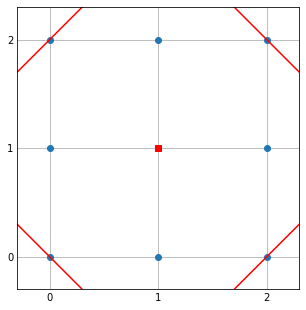

In [197]:
c = (1, 1)
R = 2
d = 2
l = 3
points = get_sphere(c, R, 2, l)
plot_circle(points, c, R, l)

In [182]:
points

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [198]:
get_sphere((1.5, 0.5, 1), 1, 3, 3)

[(1, 0, 1), (1, 1, 1), (2, 0, 1), (2, 1, 1)]

In [178]:
points = get_sphere(c, R, 2, l)
points

[(1, 0), (1, 1), (2, 0), (2, 1)]

In [165]:
a = (1,2,3,4)
a[1:]

(2, 3, 4)

In [166]:
b = (1,2)
b[1:]

(2,)

In [168]:
a+b+(4,5)

(1, 2, 3, 4, 1, 2, 4, 5)